## CVL 867 : Assignment - 03
*Submitted by: Aman Pawar*

In [1]:
# If you are not sure of the libraries kindly uncomment the undermentioned and run it in your python environment
"""
!pip install numpy 
!pip install matplotlib 
!pip install scipy

"""

'\n!pip install numpy \n!pip install matplotlib \n!pip install scipy\n\n'

In [2]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
plt.rcParams["figure.dpi"]=1200

*Answer : 01*

In [3]:
def LJ_potential(r, epsilon, sigma):
    """
    Function that codes the interaction using LJ potential

    args:
        Inputs: sigma (distance when the potential energy is zero)
                r (distance between the atomic particles)
                epsilon ()
        output: U (Interaction potential energy)
    """

    U = 4*epsilon*((sigma/r)**12 - (sigma/r)**6)
    return U

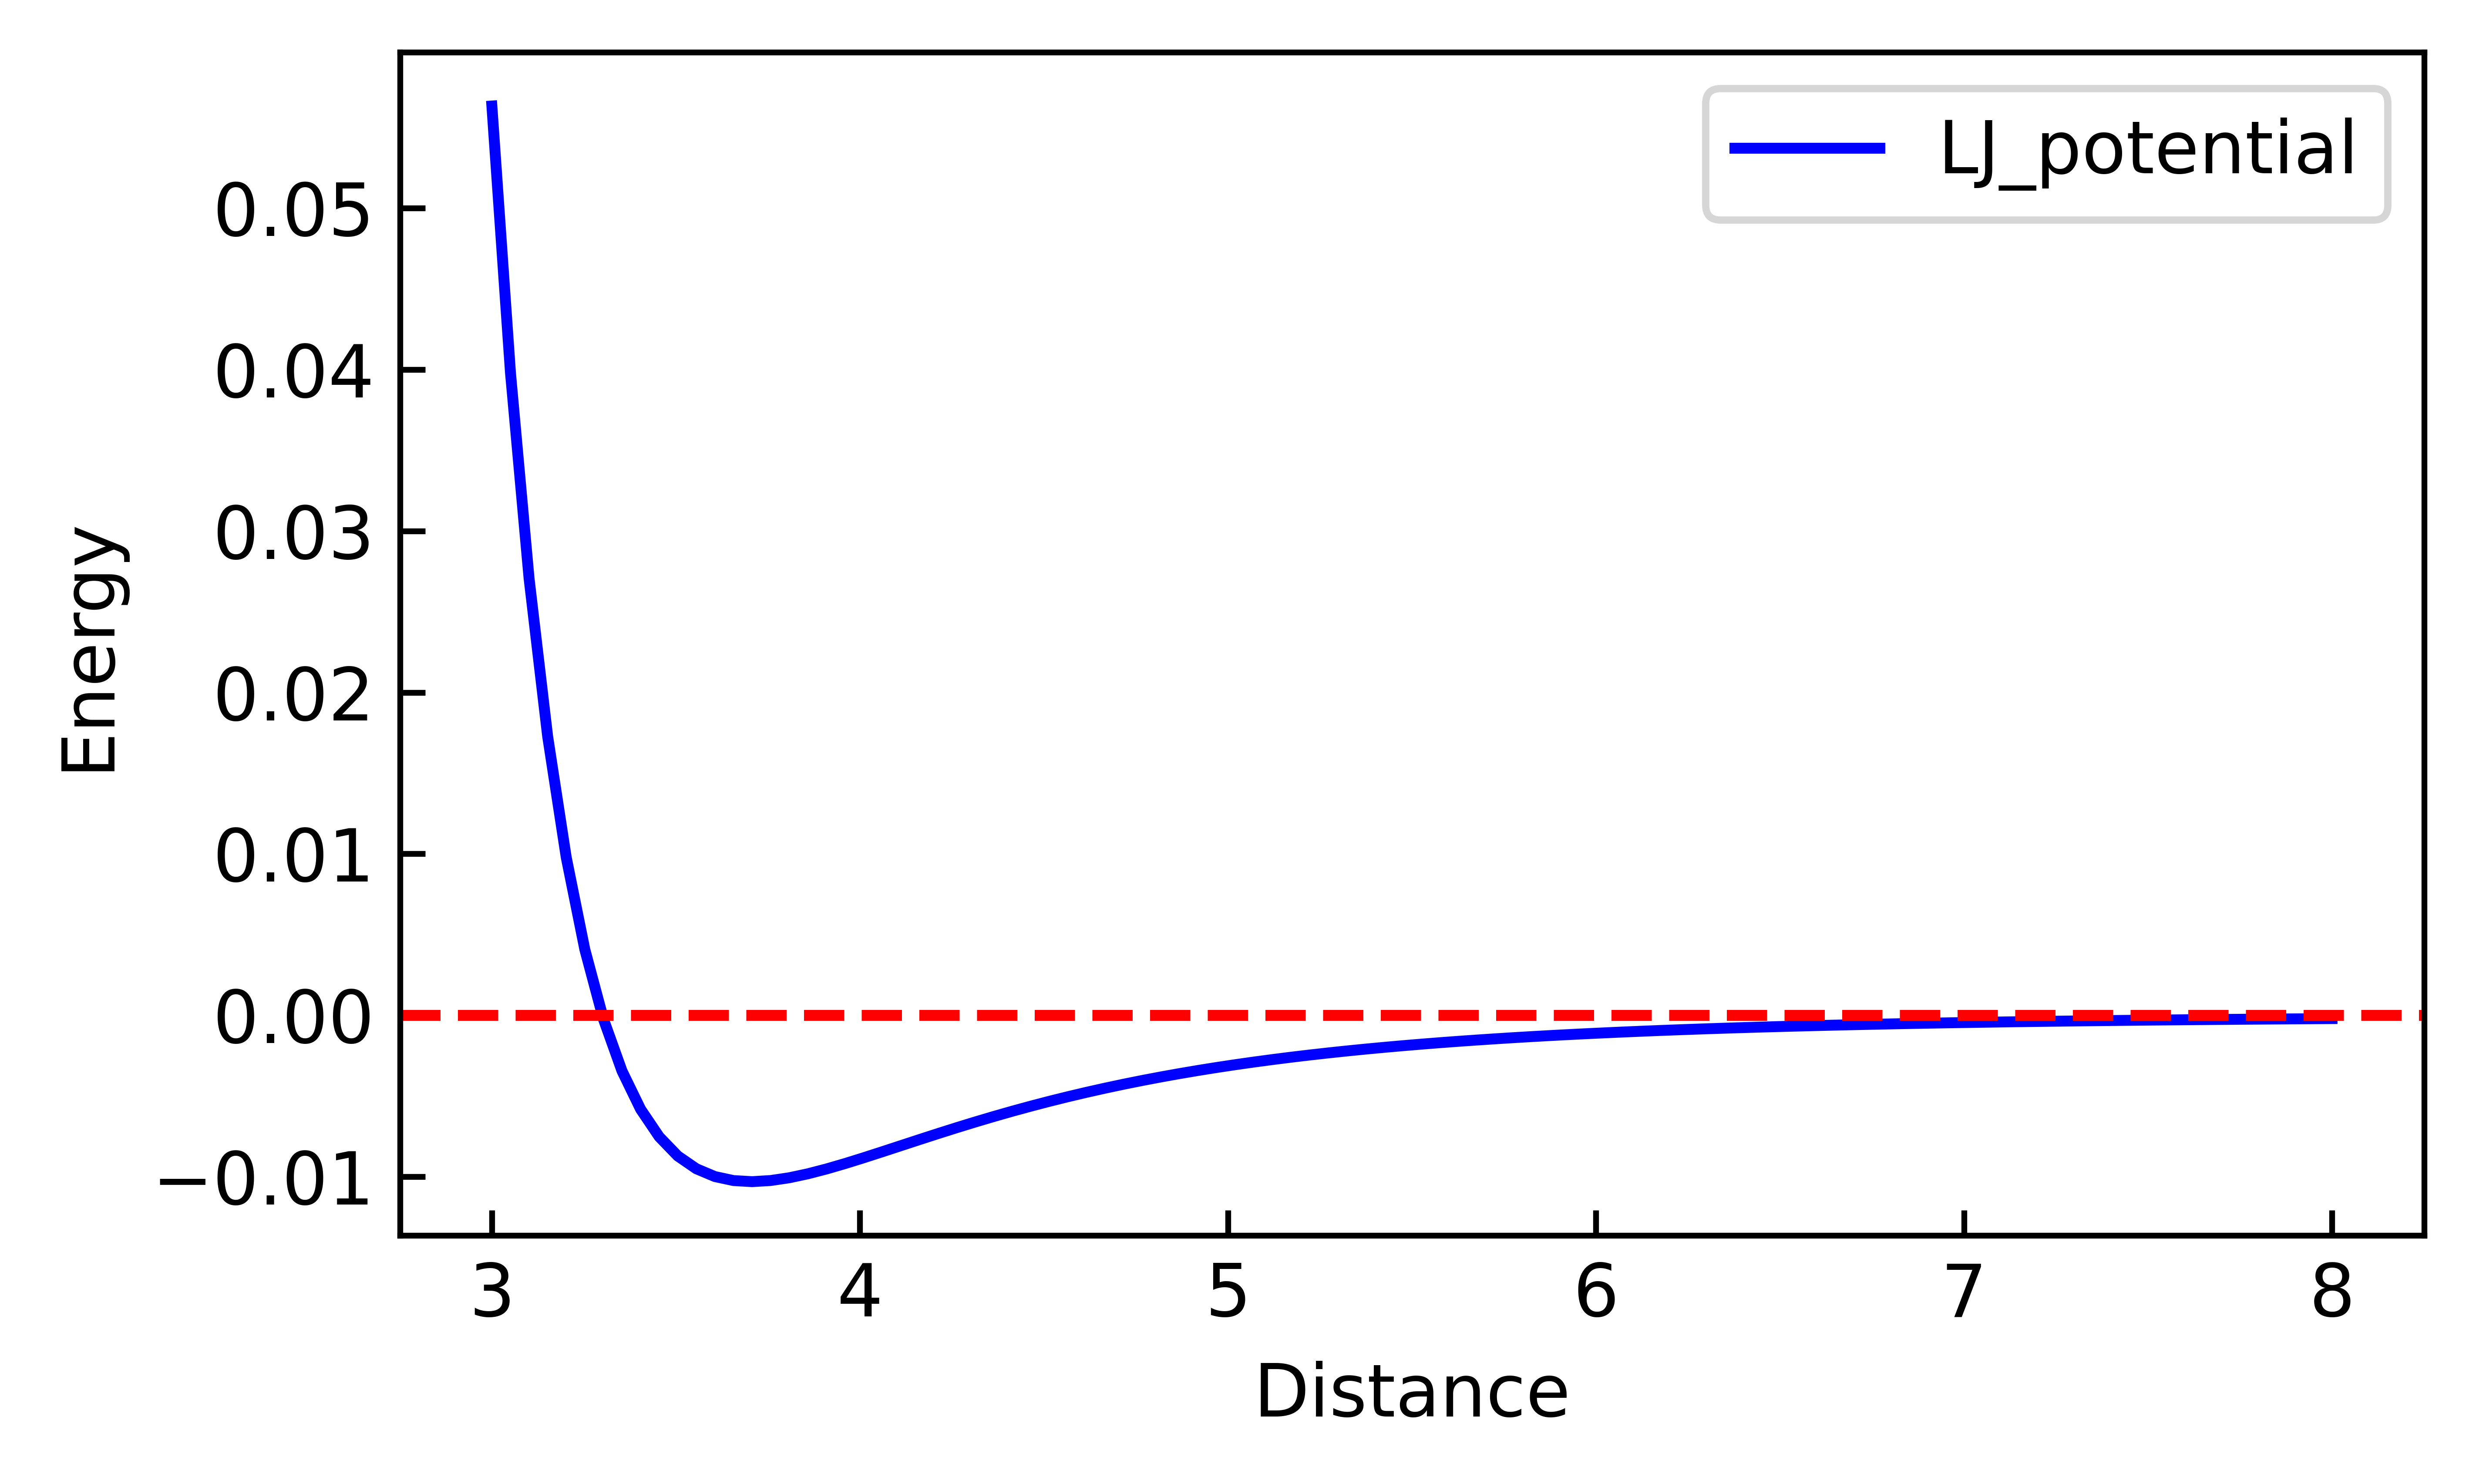

In [4]:
# Plotting the potential 
# The values of r, epsilon, sigma are manually tuned to produce a visibly good plot
r = np.linspace(3, 8, 100)

plt.figure(figsize=(5,3))
ax = plt.gca()
ax.tick_params(axis='both', direction='in')
plt.plot(r, LJ_potential(r, 0.0103, 3.3), '-b', label="LJ_potential")
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Distance')
plt.ylabel('Energy')
plt.legend()
plt.show()

*Answer : 02*

In [5]:
def LJ_potential(positions, species):
    """
    Function that calculate the potential energy of the complete system 
    provided i) periodic boundaries ii) atom type information.
    """

    # LJ parameters
    epsilon = np.array([[1.0, 1.5], [1.5, 0.5]])
    sigma = np.array([[1.0, 0.8], [0.8, 0.88]])
    rc = 2.5 * sigma

    # simulation box
    L = 4.3679
    invL = 1.0 / L

    # initialization
    N = len(positions)
    potential = 0.0

    # loop over all pairs of particles
    for i in range(N):
        for j in range(i+1, N):

            # calculate distance between particles, taking into account periodic boundaries
            r_ij = positions[j] - positions[i]
            r_ij = r_ij - np.round(r_ij * invL) * L

            # calculate the distance and the LJ parameters for the pair of atoms
            epsilon_ij = epsilon[species[i], species[j]]
            sigma_ij = sigma[species[i], species[j]]
            r = np.linalg.norm(r_ij)

            # calculate potential energy
            if r < rc[species[i], species[j]]:
                term1 = 4.0 * epsilon_ij * (np.power(sigma_ij / r, 12) - np.power(sigma_ij / r, 6))
                potential += term1

            # calculate potential energy due to periodic boundaries
            for p in range(-1, 2):
                for q in range(-1, 2):
                    if p == q == 0:
                        continue
                    r_ij_pq = r_ij + np.array([p, q, 0]) * L
                    r_pq = np.linalg.norm(r_ij_pq)
                    if r_pq < rc[species[i], species[j]]:
                        term2 = 4.0 * epsilon_ij * (np.power(sigma_ij / r_pq, 12) - np.power(sigma_ij / r_pq, 6))
                        potential += term2

    return potential


In [6]:
# load the initial positions and species arrays
positions = np.load("/content/LJ_A80B20_3D_100_pos.npy")
species = np.load("/content/LJ_A80B20_3D_100_species.npy")

energy = LJ_potential(positions, species)
print("Potential energy of the Cluster is : ", energy)

Potential energy of the Cluster is :  -795.215376006499


*Answer : 03*

In [7]:
def LJ_forces(positions, species):
    """
    Function that calculates the forces on each atom in the system 
    provided i) periodic boundaries ii) atom type information.

    Inputs:
     positions: Numpy array of shape (N, 3) containing the positions of the atoms.
     species: Numpy array of shape (N,) containing the species of the atoms.

    Outputs:
     The forces on each atom in the system.
    """

    # LJ parameters
    epsilon = np.array([[1.0, 1.5], [1.5, 0.5]])
    sigma = np.array([[1.0, 0.8], [0.8, 0.88]])
    rc = 2.5 * sigma
    
    # simulation box
    L = 4.3679
    invL = 1.0 / L
    
    # initialization
    N = len(positions)
    forces = np.zeros((N, 3))
    
    # loop over all pairs of particles
    for i in range(N):
        for j in range(i+1, N):

            # calculate distance between particles, taking into account periodic boundaries
            r_ij = positions[j] - positions[i]
            r_ij = r_ij - np.round(r_ij * invL) * L
            
            # calculate the distance and the LJ parameters for the pair of atoms
            epsilon_ij = epsilon[species[i], species[j]]
            sigma_ij = sigma[species[i], species[j]]
            r = np.linalg.norm(r_ij)
            
            # calculate force if within interaction cutoff
            if r < rc[species[i], species[j]]:
                force_magnitude = 24 * epsilon_ij / r * (2 * np.power(sigma_ij / r, 12) - np.power(sigma_ij / r, 6))
                force = force_magnitude * r_ij / r
                forces[i] -= force
                forces[j] += force
                
                # take into account periodic boundary conditions
                for d in range(3):
                    if r_ij[d] < -0.5 * L:
                        forces[i,d] += force_magnitude * L
                        forces[j,d] -= force_magnitude * L
                    elif r_ij[d] > 0.5 * L:
                        forces[i,d] -= force_magnitude * L
                        forces[j,d] += force_magnitude * L
    
    return forces

In [8]:
forces = LJ_forces(positions, species)
print(f"Forces: {forces}")

Forces: [[  7.08605405   1.07825314   3.91531799]
 [ -7.44047638   2.36273437   6.15120559]
 [ -1.6544466    0.45313252   0.97351195]
 [  0.14165811   2.37402467   2.74166668]
 [  5.7986857    7.78515494  -0.81204517]
 [  2.22262636   1.430079     2.89736143]
 [  3.55565367   0.06400741  -0.10830473]
 [ -0.28803812   0.66273603  -0.56263739]
 [ -9.81957208   9.98785068  -0.71649238]
 [  0.35943907  -0.4859165    0.04506795]
 [ -0.90406898   1.46084259  -0.55796107]
 [ -0.41906418   4.53656781  -3.188089  ]
 [ -2.79911546  -0.55107259   0.5831856 ]
 [ -0.79556851   1.36132091   0.66981326]
 [  2.04076741  -0.06413151   4.62063807]
 [  0.14998402   0.23986805  -0.113027  ]
 [  5.90042395  -2.91727569  -2.06995496]
 [  3.18760809  -1.82249802  -5.14780648]
 [-22.2820349   -5.87380338  -3.48863492]
 [ -0.7150847    4.14054801   1.92173376]
 [ -1.52807356  -2.22811711   0.26947808]
 [  3.7886195   -3.29090806  -4.23738453]
 [ 10.55180293  -1.81276589  -2.8776495 ]
 [ -2.30779353   3.8363873

In [9]:
def energy_minimization(positions, species, steps):
    """
    Function that performs energy minimization using gradient descent algorithm. 

    Inputs:
    - positions: Numpy array of shape (N, 3) containing the initial positions of the atoms.
    - species: Numpy array of shape (N,) containing the species of the atoms.
    - steps: The number of steps to run the GD algorithm for.

    Outputs:
    - The final positions of the atoms after energy minimization is complete.
    """
    
    # Set the learning rate 
    alpha = 0.001
    
    # Initialize the potential and the convergence flag
    potential = LJ_potential(positions, species)
    
    # Run the gradient descent algorithm for specified number of steps
    for i in range(steps):
        
        # Calculate the forces on the atoms
        forces = LJ_forces(positions, species)
        
        # Update the positions of the atoms
        positions_new = positions + alpha * forces
        
        # Calculate the new potential and check for convergence
        potential_new = LJ_potential(positions_new, species)

        # Printing the steps and new potential
        print(f"Step: {i}, New Potential: {potential_new}")

        # Set the new positions and potential for the next iteration
        positions = positions_new
        potential = potential_new
    
    return positions


In [10]:
new_positions = energy_minimization(positions, species, steps=100)

Step: 0, New Potential: -797.7715425536848
Step: 1, New Potential: -798.7631484918129
Step: 2, New Potential: -799.3337278183944
Step: 3, New Potential: -799.8913148426192
Step: 4, New Potential: -800.2751972082216
Step: 5, New Potential: -800.6129124103093
Step: 6, New Potential: -800.839185480395
Step: 7, New Potential: -801.0861362071761
Step: 8, New Potential: -801.3111156562787
Step: 9, New Potential: -801.5756812230351
Step: 10, New Potential: -801.8339891445362
Step: 11, New Potential: -802.0556464690594
Step: 12, New Potential: -802.1852242844253
Step: 13, New Potential: -802.3629827522313
Step: 14, New Potential: -802.5408477725504
Step: 15, New Potential: -802.7113152507228
Step: 16, New Potential: -802.8996019147966
Step: 17, New Potential: -803.0655842204574
Step: 18, New Potential: -803.1931269590882
Step: 19, New Potential: -803.3643370346022
Step: 20, New Potential: -803.4817230207693
Step: 21, New Potential: -803.6271288298817
Step: 22, New Potential: -803.7762585155987

In [11]:
energy_new = LJ_potential(new_positions, species)
energy = LJ_potential(positions, species)
print("Potential energy of the Cluster is : ", energy)
print("Potential energy of the Cluster  after Energy minimization is : ", energy_new)

Potential energy of the Cluster is :  -795.215376006499
Potential energy of the Cluster  after Energy minimization is :  -807.3123933351335


*Answer : 04*

In [12]:

def assign_velocities(positions, temperature):
    """
    Function to assign velocities to particles according to a given temperature using a Gaussian distribution.
    since: 1/2*m*v^2 = 3/2*N*k_B*T
    therefor: v = sqrt(3*N* k_B * temperature / m)
    hence std_dev = sqrt(3* k_B * temperature / m)
    """

    # Boltzmann constant
    k_B = 1.38064852e-23  # J/K

    # mass of particles
    m = 1.0  
    
    # number of particles
    N = len(positions)
    
    # standard deviation of the Gaussian distribution
    sigma = np.sqrt(3* k_B * temperature / m)
    
    # assign velocities according to the Gaussian distribution
    velocities = np.random.normal(0.0, sigma, size=(N, 3))
    
    return velocities


In [13]:
# assign velocities corresponding to a temperature of T=2.0
temperature = 2.0 
velocities = assign_velocities(positions, temperature)

print(f"Velocities of particles: {velocities}")

Velocities of particles: [[ 6.43915909e-12 -1.33107800e-11 -1.26284340e-11]
 [ 9.18142442e-12 -5.03514488e-12 -3.80696872e-12]
 [-1.05591334e-11  3.64463219e-13 -2.01413772e-12]
 [ 7.52093168e-12  3.36403821e-12  4.50550298e-12]
 [ 1.31267205e-11  2.27601510e-12  9.90332604e-12]
 [-4.71368842e-12 -5.17424016e-12  1.81332334e-12]
 [ 1.13856282e-11 -1.30627927e-11  4.47670956e-12]
 [ 1.53098089e-11 -4.98967619e-12 -1.44386668e-12]
 [ 3.23965515e-13  1.89251147e-11 -5.53076163e-12]
 [ 1.80902718e-11  1.08259554e-11  1.03665608e-11]
 [ 8.37178237e-12 -8.06414831e-12 -5.15745613e-12]
 [-7.61126056e-12  9.13037195e-12  9.16380392e-13]
 [ 2.66358713e-12 -6.10242142e-12 -5.46522291e-12]
 [-2.27315929e-12  1.19230903e-11  6.54224681e-12]
 [ 4.06392307e-12 -1.53843668e-12 -5.56189869e-12]
 [ 2.16581410e-13  3.49531532e-12 -8.02579988e-12]
 [-4.21959236e-12  8.57215223e-12  5.01844817e-12]
 [-5.24208903e-13 -3.65737578e-12  1.12587857e-11]
 [-1.71627262e-12  4.47260595e-12 -6.67325240e-12]
 [ 1.2

*Answer : 05*

In [14]:
def LJ_acceleration(positions, velocities, species):
    """
    Function that calculates the acceleration on each atom in the system 
    provided i) periodic boundaries ii) atom type information.

    Inputs:
     positions: Numpy array of shape (N, 3) containing the positions of the atoms.
     velocities: Numpy array of shape (N, 3) containing the velocities of the atoms.
     species: Numpy array of shape (N,) containing the species of the atoms.

    Outputs:
    acceleration on each atom in the system.
    """

    # LJ parameters
    epsilon = np.array([[1.0, 1.5], [1.5, 0.5]])
    sigma = np.array([[1.0, 0.8], [0.8, 0.88]])
    rc = 2.5 * sigma
    
    # simulation box
    L = 4.3679
    invL = 1.0 / L
    
    # initialization
    N = len(positions)
    acceleration = np.zeros((N, 3))
    mass = np.array([1.0]*N)
    
    # loop over all pairs of particles
    for i in range(N):
        for j in range(i+1, N):

            # calculate distance between particles, taking into account periodic boundaries
            r_ij = positions[j] - positions[i]
            r_ij = r_ij - np.round(r_ij * invL) * L
            
            # calculate the distance and the LJ parameters for the pair of atoms
            epsilon_ij = epsilon[species[i], species[j]]
            sigma_ij = sigma[species[i], species[j]]
            r = np.linalg.norm(r_ij)
            
            # calculate acceleration if within interaction cutoff
            if r < rc[species[i], species[j]]:
                force_magnitude = -(24 * epsilon_ij / r * (2 * np.power(sigma_ij / r, 12) - np.power(sigma_ij / r, 6)))
                force = force_magnitude * r_ij / r
                acceleration_i = force / mass[species[i]]
                acceleration_j = -force / mass[species[j]]
                acceleration[i] += acceleration_i
                acceleration[j] += acceleration_j
                
                # take into account periodic boundary conditions
                for d in range(3):
                    if r_ij[d] < -0.5 * L:
                        acceleration[i,d] += force_magnitude * L / mass[species[i]]
                        acceleration[j,d] -= force_magnitude * L / mass[species[j]]
                    elif r_ij[d] > 0.5 * L:
                        acceleration[i,d] -= force_magnitude * L / mass[species[i]]
                        acceleration[j,d] += force_magnitude * L / mass[species[j]]
    
    return acceleration


In [15]:
def NVE_step(positions, velocities, species, dt):
    """
    Perform one step of NVE simulation using velocity-verlet algorithm
    """

    # Calculate the current force and acceleration on each particle
    acceleration = LJ_acceleration(positions, velocities, species)
    
    # Update the particle positions using the current velocities and acceleration
    positions_new = positions + velocities*dt + 0.5*acceleration*dt*dt
    
    # Calculate the new force and acceleration on each particle using the updated positions
    acceleration_new = LJ_acceleration(positions_new, velocities, species)
    
    # Update the particle velocities using the current and new accelerations
    velocities_new = velocities + 0.5*(acceleration + acceleration_new)*dt
    
    return positions_new, velocities_new

In [16]:
dt = 0.003
# Perform one step of NVE simulation
positions_NVE, velocities_NVE = NVE_step(positions, velocities, species, dt)

print(f"positions : {positions_NVE}, Velocities {velocities_NVE}")

positions : [[2.52842178 3.27389914 1.44731549]
 [2.21388728 0.01205025 1.67922954]
 [2.28991602 3.06922305 0.47039444]
 [0.56730625 4.02181793 2.60038589]
 [2.32982527 2.4525904  2.12035831]
 [3.1667979  3.71378043 0.46258153]
 [3.02305959 2.24096392 4.21211724]
 [3.22123649 4.33574813 3.59621331]
 [1.62829401 3.80321605 4.15031266]
 [2.20429566 1.86786378 3.89560709]
 [4.18201999 3.30891932 0.77823751]
 [1.85290248 2.18180451 3.05096872]
 [3.70513728 0.01589822 1.15295449]
 [0.23028145 1.37637215 3.26697324]
 [0.74600126 2.35927194 3.1804728 ]
 [3.54394086 0.52054031 0.09117664]
 [1.51322621 3.71418901 2.12313535]
 [1.31184506 0.04380931 1.15351998]
 [3.06735856 2.52495059 1.61774381]
 [1.05804344 0.07742914 2.00477608]
 [2.21131295 2.76032851 3.84799679]
 [0.49332476 0.72593724 2.49559927]
 [0.79956572 0.89416948 0.73616299]
 [3.71132109 3.65630786 2.89267336]
 [2.78544923 0.56327889 0.84980098]
 [1.38760143 2.16420844 4.04719126]
 [0.73225906 3.60743649 1.4309767 ]
 [2.17019745 2.0

*Answer : 06*

In [17]:
dt = 0.003
total_num_of_steps = 1000
# Generate the trajectory
trajectory = [positions]
for i in range(total_num_of_steps):
    positions, velocities = NVE_step(positions, velocities, species, dt)
    trajectory.append(positions)

# Save the trajectory as a numpy array
np.save("Trajectory.npy", np.array(trajectory))

In [18]:
# Prininting the shape of trajectory
trajectory = np.array(trajectory)
trajectory.shape

(1001, 100, 3)

*Answer : 07 Bonus*

In [27]:
def save_xyz_trajectory(trajectory, species, filename):
    """
    Save the trajectory in Ovito's xyz format
    
    Args:
        trajectory (numpy.ndarray): Trajectory array of shape (n_steps, n_particles, 3)
        species (list): List of species corresponding to each particle
        filename (str): Name of the output file
    """
    n_particles = trajectory.shape[1]
    n_steps = trajectory.shape[0]
    species = [str(s) for s in species]
    box_size = 4.3679
    with open(filename, 'w') as f:
        for step in range(n_steps):
            # f.write(str(n_particles) + '\n')
            f.write(f"ITEM: TIMESTEP \n{str(step)}\nITEM: NUMBER OF ATOMS\n100\nITEM: BOX BOUNDS p p p\n0.00 4.3679\n0.00 4.3679\n0.00 4.3679\nITEM: ATOMS id type x y z\n")
            #f.write("Lattice=\""+str(box_size)+"0.0 0.0 0.0 "+str(box_size)+" 0.0 0.0 0.0 "+str(box_size)+"\" Properties=species:S:1:pos:R:3 Time="+str(step)+"\n")
            for particle in range(n_particles):
                f.write(str(particle+1) + " "+ str(species[particle] + ' ' + ' '.join(map(str, trajectory[step, particle])) + '\n'))

                

# Save trajectory in xyz format
save_xyz_trajectory(trajectory, species, 'trajectory.xyz')
